# Properties

A property represent a particular attribute of an automaton.  It can be of any type (boolean, integer, ...).  Some are defined in the C++ library, like `is_deterministic` or `is_proper`, which are Boolean properties.

Properties are stored in the "cache" of an automaton.  Some algorithms on automata update the cache.

After an update, a property can be:
- invalidated, its value is considered unknown or undefined,
- preserved, its value did not change after the algorithm,
- or defined, its value is updated.

How the "cache" is updated is specific to each function. By default, a cache update will invalidate all properties.  In some cases, it will also define properties, like `determinize` which set `is_deterministic` to true.

# Example

In [1]:
import vcsn

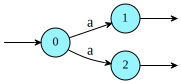

In [2]:
%%automaton -s a
$ -> 0
0 -> 1 a
0 -> 2 a
1 -> $
2 -> $

The cache is fresh, the `is_deterministic` property is  undefined:

In [3]:
a.info('is deterministic', strict=False)

'N/A'

Computation of `is_deterministic` will be cached:

In [4]:
a.is_deterministic()

False

In [5]:
a.info('is deterministic', strict=False)

False

`determinize` sets the `is_deterministic` property to true:

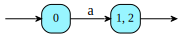

In [6]:
b = a.determinize()
b

In [7]:
b.info('is deterministic', strict=False)

True

# Tape properties

Properties can refer to the global automaton or to a focused tape of the automaton, by using a special `on_tape` property, invisible from the Python interface.

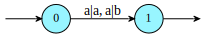

In [8]:
%%automaton -s t
context = lat<lal(ab), lal(ab)>, b
$ -> 0
0 -> 1 a|a, a|b
1 -> $

In [9]:
t.is_deterministic()

False

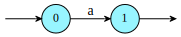

In [10]:
f0 = t.focus(0)
f0

Computing `is_deterministic` on a `focus_automaton` will define the corresponding `on_tape` property for `t`. This can only be seen on the C++ side, as `info` will display `on_tape` properties as the `focus_automaton`'s own properties.

In [11]:
f0.is_deterministic()

False

In [12]:
f0.info('is deterministic', strict=False)

False

In [13]:
t.info('is deterministic', strict=False)

False

# User properties and customization of cache update 

Users can define their own properties in their C++ program and customize the behavior of the `cache` update for a given function.  For more details, see 
`tests/demo/property.cc`.

# List of properties

- `is_deterministic`, Boolean
- `is_proper`, Boolean
- `is_free`, Bsoolean

# List of functions with a cache update

Indicate if a value is defined and state between parentheses the other functions called by the first one that also update the cache. Between brackets are some particular behavior.

- `accessible`
- `add`
- `cerny`: `is_deterministic`
- `coaccessible`
- `codeterminize` (`transpose`, `determinize`)
- `cominimize` (`transpose`, `minimize`)
- `complement`
- `complete`
- `compose`
- `conjugate`
- `conjunction`: `is_deterministic` for deterministic version
- `costandard` (`transpose`, `standard`)
- `cotrie` (`transpose`)
- `de_bruijn`: `!is_deterministic`
- `derived_term`
- `determinize`: `is_deterministic`
- `divkbaseb`
- `double_ring`
- `eliminate_state`
- `factor` (`suffix`, `prefix`)
- `filter`
- `inductive`
- `infiltrate`
- `ladybird`: `!is_deterministic`
- `ldivide`
- `letterize`
- `lift`: `!is_proper`
- `lweight`
- `minimize` (for brzozowski: `determinize` and `codeterminize`, for the other: `quotient`)
- `multiply`
- `normalize` (`costandard`, `standard`)
- `pair`
- `partial_identity`
- `prefix` (`tranpose`, `suffix`)
- `project`
- `proper`: `is_proper` (for forward direction: `transpose`, `proper`)
- `push_weights`
- `quotient`
- `quotkbaseb`
- `rdivide` (`transpose`, `ldivide`)
- `realtime` (`proper`, `letterize`)
- `reduce`
- `rweight`
- `shuffle`
- `sort` [preserve properties]
- `standard`
- `star`
- `subword`
- `suffix` 
- `synchronize`
- `thompson`
- `to_spontaneous`
- `transpose`
- `trie`: `is_deterministic`
- `trim`
- `tuple`
- `u`
- `universal`
- `zpc`

# Notes

- A `copy` of an automaton copies its cache.
- `automaton_decorator`'s cache is the same as the underlying automaton.
- `permutation_automaton` has his own cache but copies the original cache.
- `tranpose_automaton` has his own cache.